In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(test.shape +  train.shape)

(1459, 80, 1460, 81)


In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
#Checking Skew
train.SalePrice.skew()

1.8828757597682129

In [8]:
#Logging due to high Skew
logSalePrice = np.log(train.SalePrice)
logSalePrice.skew()

0.12133506220520406

In [9]:
#Checking numerical values
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [10]:
#Checking correlation
corr = numeric_features.corr()
positive_corr = corr["SalePrice"].sort_values(ascending=False)[1:6]
negative_corr = corr["SalePrice"].sort_values(ascending=False)[-5:]
print(positive_corr)
print(negative_corr)
positive_corr_all = corr["SalePrice"].sort_values(ascending=False)
print(positive_corr_all)

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold    

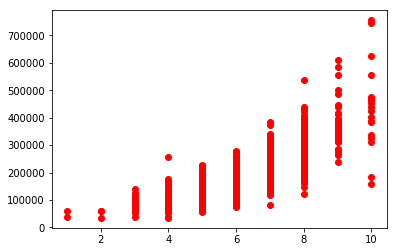

In [11]:
#looking into OverallQual
plt.plot(train.OverallQual, train.SalePrice, "ro")

In [12]:
#Getting Median and Mean
oq_mean = train.groupby(["OverallQual"]).SalePrice.mean()
oq_median = train.groupby(["OverallQual"]).SalePrice.median()
print(oq_mean)
print(oq_median)

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64
OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64


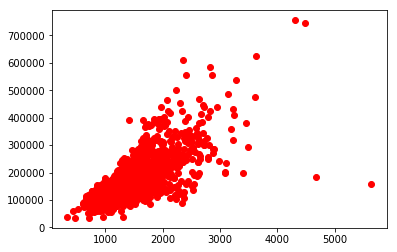

In [13]:
#Looking into GrLivArea
plt.plot(train.GrLivArea, train.SalePrice, "ro")

In [14]:
#Get rid of outliers
train = train[train.GrLivArea < 4500]

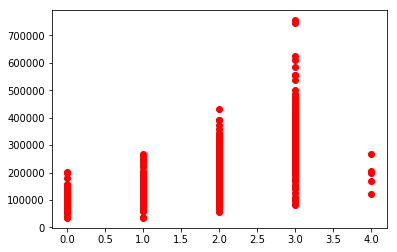

In [15]:
#Looking into GarageCars
plt.plot(train.GarageCars, train.SalePrice, "ro")

In [16]:
#Get Mean and Median
gc_mean = train.groupby(["GarageCars"]).SalePrice.mean()
gc_median = train.groupby(["GarageCars"]).SalePrice.median()
print(gc_mean)
print(gc_median)

GarageCars
0    103317.283951
1    128116.688347
2    183880.645200
3    310329.933333
4    192655.800000
Name: SalePrice, dtype: float64
GarageCars
0    100000.0
1    128000.0
2    178000.0
3    295246.5
4    200000.0
Name: SalePrice, dtype: float64


In [17]:
#4 garage cars kind of feels like an outlier
train.loc[train.GarageCars == 4]
#There's only 5 I may get rid of 4.0 all togther

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,421,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1340,1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


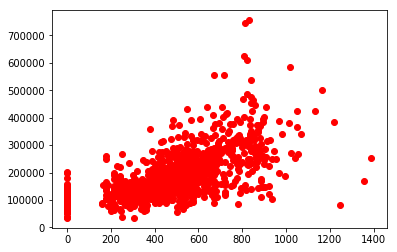

In [18]:
#Looking into GarageArea
plt.plot(train.GarageArea, train.SalePrice, "ro")

In [19]:
#Getting rid of outliers
train = train[train.GarageArea < 1200]

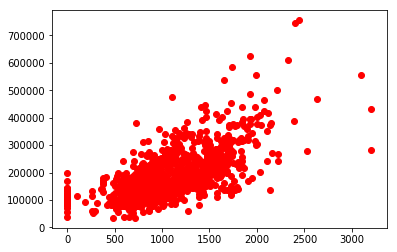

In [20]:
#Looking into TotalBsmtSF
plt.plot(train.TotalBsmtSF, train.SalePrice, "ro")
#Looks fine tbh

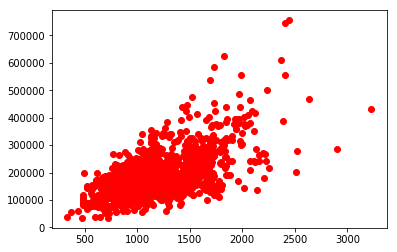

In [21]:
#Looking into 1stFlrSF
plt.plot(train["1stFlrSF"], train.SalePrice, "ro")
#this one is ok as well tbh

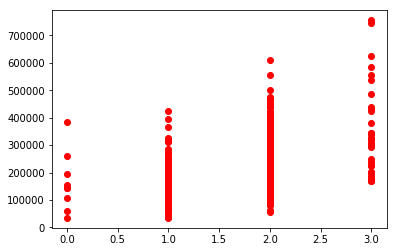

In [22]:
#Looking into FullBath 
plt.plot(train.FullBath, train.SalePrice, "ro")

In [23]:
#Getting mean and median
fb_mean = train.groupby(["FullBath"]).SalePrice.mean()
fb_median = train.groupby(["FullBath"]).SalePrice.median()
print(fb_mean)
print(fb_median)
#K That's it for now

FullBath
0    165200.888889
1    134783.080247
2    212801.637908
3    352918.937500
Name: SalePrice, dtype: float64
FullBath
0    145000
1    132375
2    196500
3    322500
Name: SalePrice, dtype: int64


In [24]:
#checking for nulls in numeric_features
numeric_features.isnull().sum().sort_values(ascending = False)[:4]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
BsmtFinSF1       0
dtype: int64

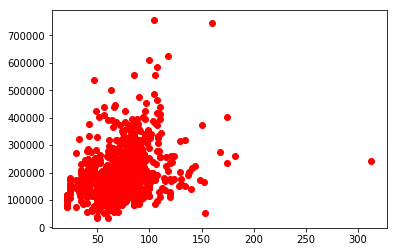

In [25]:
plt.plot(train.LotFrontage, train.SalePrice, "ro")
#Not sure how to deal with this yet

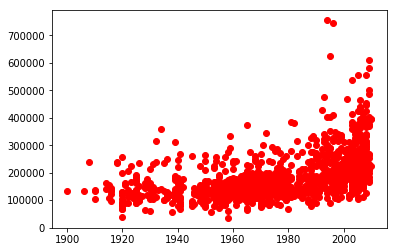

In [26]:
plt.plot(train.GarageYrBlt, train.SalePrice, "ro")

In [27]:
#Checking non-numeric values
text_features = train.select_dtypes(exclude=[np.number])

In [28]:
text_features.isnull().any()

MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleCondition    False
dtype: bool

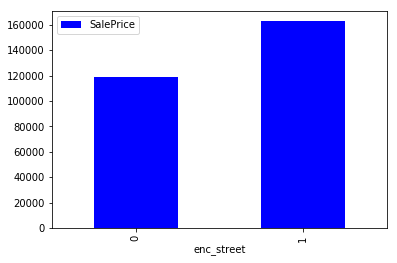

In [30]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)
condition_pivot = train.pivot_table(index='enc_street',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')

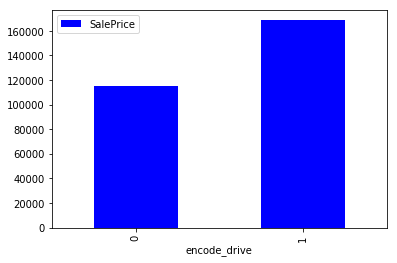

In [32]:
def encode_drive(x): return 1 if x == "Y" else 0
test["encode_drive"] = test.PavedDrive.apply(encode_drive)
train["encode_drive"] = train.PavedDrive.apply(encode_drive)
condition_pivot = train.pivot_table(index='encode_drive',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')

array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

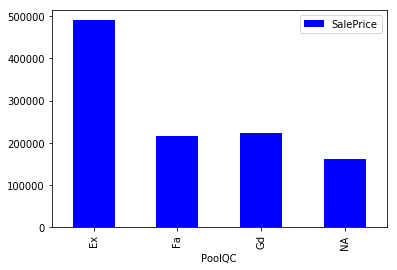

In [33]:
train.PoolQC.fillna("NA", inplace = True)
test.PoolQC.fillna("NA", inplace = True)
condition_pivot = train.pivot_table(index='PoolQC',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
train.PoolQC.unique()

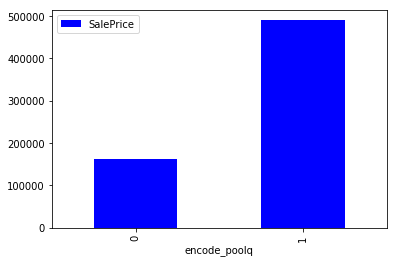

In [34]:
def encode_pool(x): return 1 if x == 'Ex' else 0
train['encode_poolq'] = train.PoolQC.apply(encode_pool)
test['encode_poolq'] = test.PoolQC.apply(encode_pool)
condition_pivot = train.pivot_table(index='encode_poolq',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')

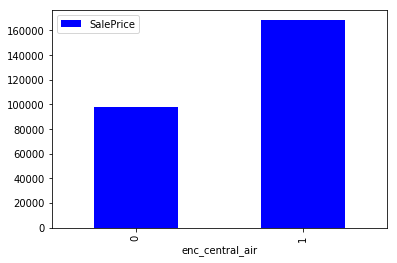

In [35]:
train['enc_central_air'] = pd.get_dummies(train.CentralAir, drop_first=True)
test['enc_central_air'] = pd.get_dummies(train.CentralAir, drop_first=True)
condition_pivot = train.pivot_table(index='enc_central_air',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')

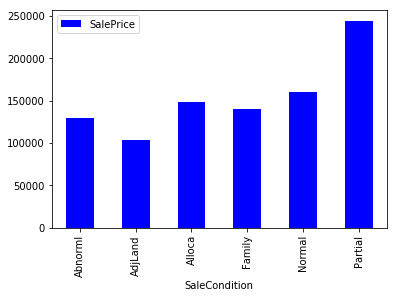

In [36]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')

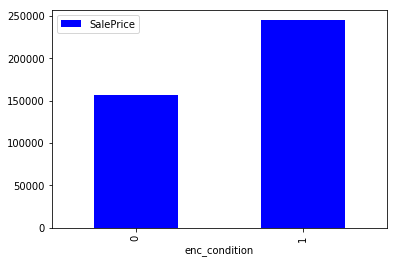

In [37]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)
condition_pivot = train.pivot_table(index='enc_condition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')

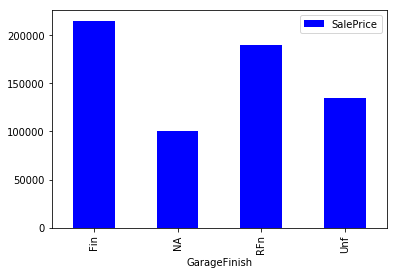

In [38]:
train.GarageFinish.fillna("NA", inplace=True)
test.GarageFinish.fillna("NA", inplace=True)
condition_pivot = train.pivot_table(index='GarageFinish',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')

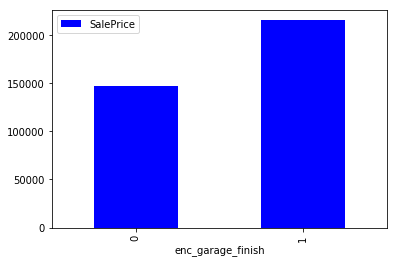

In [39]:
def encode_garage_finish(x): return 1 if x == "Fin" or x == "Rfn" else 0
train['enc_garage_finish'] = train.GarageFinish.apply(encode_garage_finish)
test['enc_garage_finish'] = test.GarageFinish.apply(encode_garage_finish)
condition_pivot = train.pivot_table(index='enc_garage_finish',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')

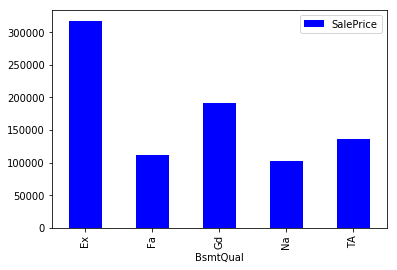

In [40]:
train.BsmtQual.fillna("Na", inplace = True)
test.BsmtQual.fillna("Na", inplace = True)
condition_pivot = train.pivot_table(index='BsmtQual',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')

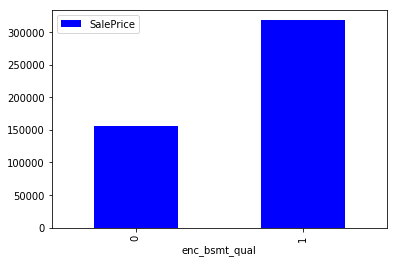

In [41]:
def encode(x): return 1 if x == "Ex" else 0
train['enc_bsmt_qual'] = train.BsmtQual.apply(encode)
test['enc_bsmt_qual'] = test.BsmtQual.apply(encode)
condition_pivot = train.pivot_table(index='enc_bsmt_qual',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')

In [42]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
data2 = test.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() != 0)
sum(data2.isnull().sum() != 0)

0

In [43]:
y = np.log(train.SalePrice)
X = data.drop(["SalePrice", "Id"], axis=1)


In [44]:
lg = LinearRegression()

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [46]:
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.017434584806148377

In [48]:
submission = pd.DataFrame()
submission["Id"] = test.Id

In [49]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [50]:
predictions = lg.predict(feats)

In [51]:
final_predictions = np.exp(predictions)
final_predictions

array([126420.10397545, 119054.94571364, 178192.53210321, ...,
       187701.54970713, 109380.12022775, 237696.98832411])

In [52]:
submission["SalePrice"] = final_predictions
submission.head()

,Id,SalePrice
0,1461,126420.103975
1,1462,119054.945714
2,1463,178192.532103
3,1464,196663.645059
4,1465,177443.662723


In [53]:
submission.to_csv('submission2.csv', index=False)
